# Data Inspection and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
hotel_bookings = pd.read_csv('hotel_bookings.csv')

# Display the first few rows of the dataset
hotel_bookings.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [2]:
# Check for missing values
missing_values = hotel_bookings.isnull().sum()
missing_values[missing_values > 0]


adults                       1
children                     4
country                    507
market_segment               2
distribution_channel         1
reserved_room_type           1
assigned_room_type           1
deposit_type                21
agent                    16340
company                 112593
customer_type               31
reservation_status           1
dtype: int64

In [3]:
hotel_bookings.duplicated().sum()

31979

In [4]:
# Handling missing values (decide on imputation or dropping based on the context)
hotel_bookings.fillna({'children': 0, 'country': 'Unknown', 'agent': 0, 'company': 0}, inplace=True)


In [5]:
missing_values = hotel_bookings.isnull().sum()
missing_values[missing_values > 0]

adults                   1
market_segment           2
distribution_channel     1
reserved_room_type       1
assigned_room_type       1
deposit_type            21
customer_type           31
reservation_status       1
dtype: int64

In [6]:
hotel_bookings.fillna({'adults':hotel_bookings['adults'].mean()}, inplace=True)

In [7]:
hotel_bookings.fillna( {'market_segment':hotel_bookings['market_segment'].mode()[0]}, inplace=True)

In [8]:
hotel_bookings.fillna({'distribution_channel':hotel_bookings['distribution_channel'].mode()[0]}, inplace=True)

In [9]:
hotel_bookings.fillna(  {'reserved_room_type':hotel_bookings['reserved_room_type'].mode()[0]}, inplace=True)

In [10]:
hotel_bookings.fillna( {'assigned_room_type':hotel_bookings['assigned_room_type'].mode()[0]},inplace=True)

In [11]:
hotel_bookings.fillna(  {'deposit_type':hotel_bookings['deposit_type'].mode()[0]}, inplace=True)

In [12]:
 hotel_bookings.fillna( {'customer_type':hotel_bookings['customer_type'].mode()[0]},inplace=True)

In [13]:
 hotel_bookings.fillna({'reservation_status':hotel_bookings['reservation_status'].mode()[0]},inplace=True)

In [14]:
missing_values = hotel_bookings.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [15]:
hotel_bookings.duplicated().sum()

31987

In [16]:
hotel_bookings=hotel_bookings.drop_duplicates()

In [17]:
hotel_bookings.duplicated().sum()

0

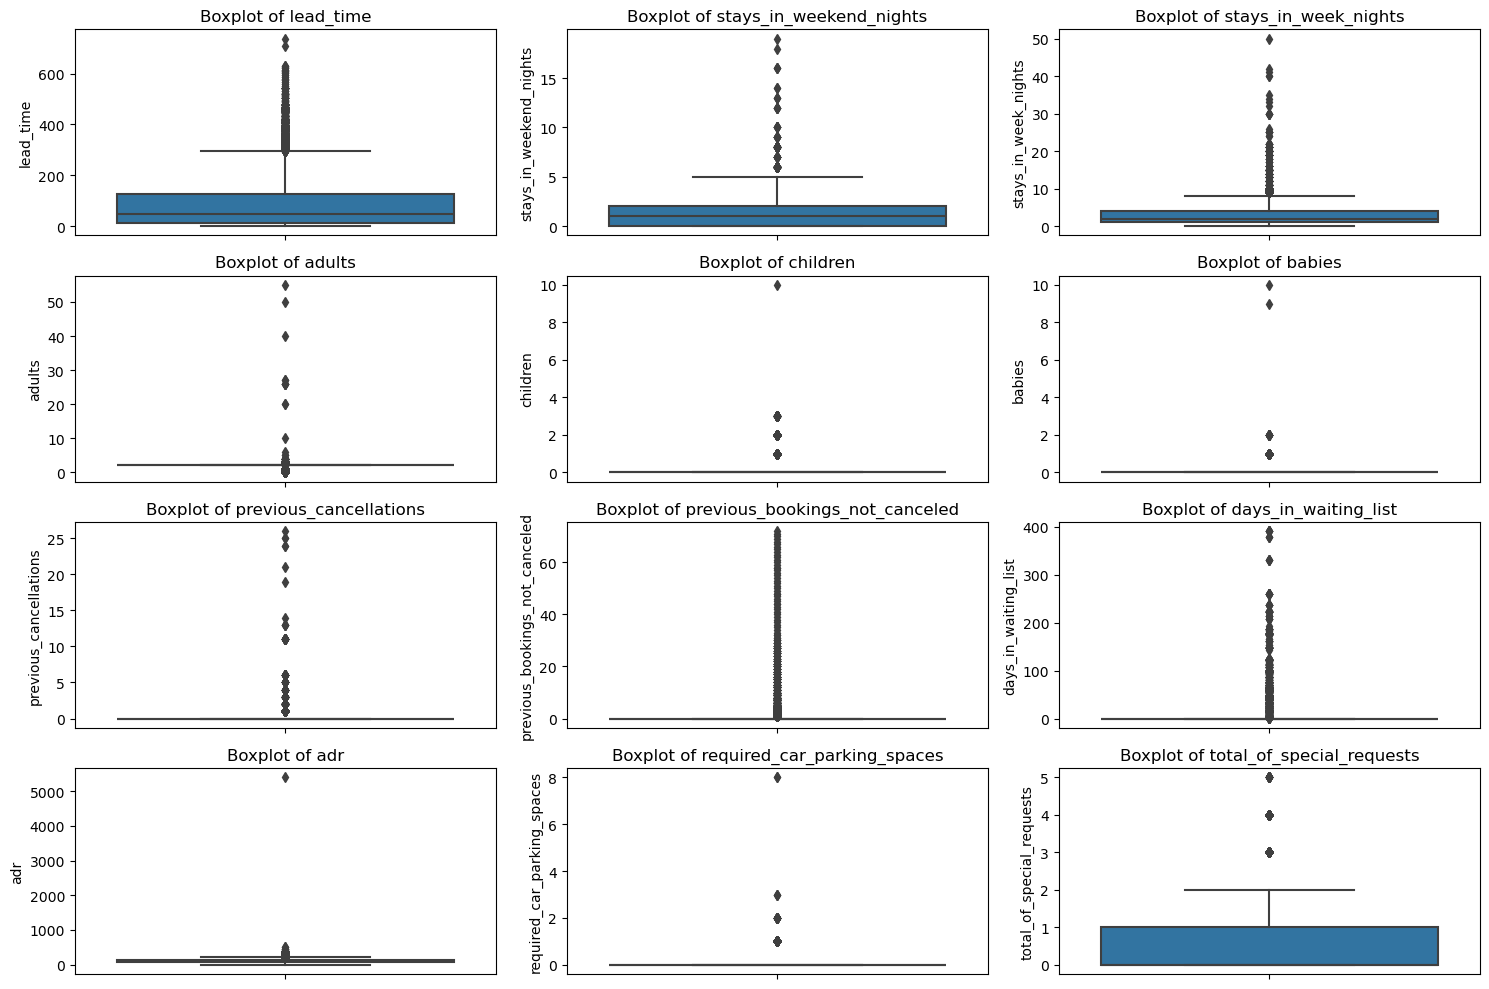

In [18]:
# Identify outliers using IQR method or visual inspection via box plots
import seaborn as sns
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Visual inspection of outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=hotel_bookings[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

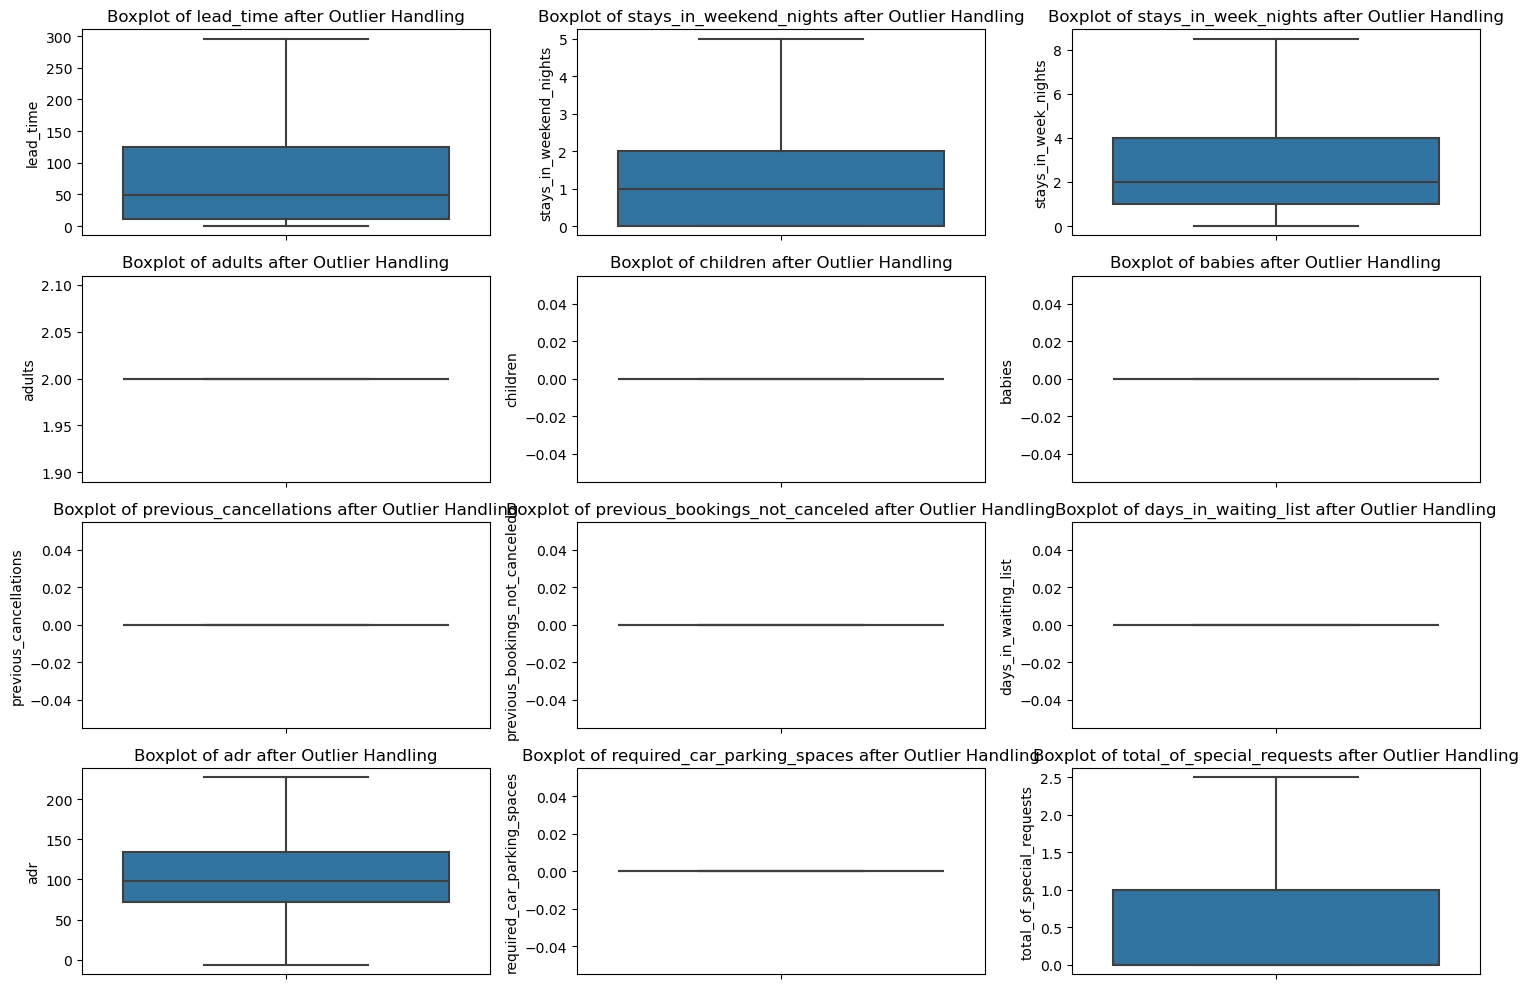

In [19]:
# Function to detect and handle outliers using IQR method
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Handling outliers by capping them to the lower and upper bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Apply the function to handle outliers in numerical columns
hotel_bookings_cleaned = handle_outliers(hotel_bookings.copy(), numerical_columns)

# Verify by plotting the box plots again
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=hotel_bookings_cleaned[column])
    plt.title(f'Boxplot of {column} after Outlier Handling')
plt.tight_layout()
plt.show()


In [21]:
# Checking for invalid values in numerical columns
invalid_values = {}

# Adults, children, babies should be non-negative
invalid_values['adults'] = hotel_bookings[hotel_bookings['adults'] < 0]
invalid_values['children'] = hotel_bookings[hotel_bookings['children'] < 0]
invalid_values['babies'] = hotel_bookings[hotel_bookings['babies'] < 0]

# Stays in weekend nights and stays in week nights should be non-negative
invalid_values['stays_in_weekend_nights'] = hotel_bookings[hotel_bookings['stays_in_weekend_nights'] < 0]
invalid_values['stays_in_week_nights'] = hotel_bookings[hotel_bookings['stays_in_week_nights'] < 0]

# Print any found invalid values
for key, value in invalid_values.items():
    if not value.empty:
        print(f"Invalid values in {key}:\n", value)


In [24]:
# Checking for typos or inconsistencies in categorical columns
def check_categorical_inconsistencies(df, column):
    return df[column].value_counts()

categorical_inconsistencies = {}
for column in categorical_columns:
    categorical_inconsistencies[column] = check_categorical_inconsistencies(hotel_bookings, column)

# Print unique values for each categorical column to check for inconsistencies
for key, value in categorical_inconsistencies.items():
    print(f"Unique values in {key}:\n", value)


Unique values in hotel:
 hotel
City Hotel      53434
Resort Hotel    33969
Name: count, dtype: int64
Unique values in country:
 country
PRT    27452
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 178, dtype: int64
Unique values in market_segment:
 market_segment
Online TA        51620
Offline TA/TO    13888
Direct           11805
Groups            4947
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64
Unique values in distribution_channel:
 distribution_channel
TA/TO        69147
Direct       12989
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64
Unique values in is_repeated_guest:
 is_repeated_guest
0    83988
1     3415
Name: count, dtype: int64
Unique values in reserved_room_type:
 reserved_room_type
A    56559
D    17397
E     6049
F     2824
G     2052
B      999
C      915
H   

In [25]:
# Ensure that 'adults', 'children', and 'babies' are not all zero (anomalous bookings)
anomalous_bookings = hotel_bookings[(hotel_bookings['adults'] == 0) & (hotel_bookings['children'] == 0) & (hotel_bookings['babies'] == 0)]
print("Anomalous bookings where adults, children, and babies are all zero:\n", anomalous_bookings)


Anomalous bookings where adults, children, and babies are all zero:
                hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409            

# Descriptive Statistics

In [ ]:
hotel_bookings.describe()

In [23]:
# Display value counts for categorical columns
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

value_counts = {}
for column in categorical_columns:
    value_counts[column] = hotel_bookings[column].value_counts()

value_counts


{'hotel': hotel
 City Hotel      53434
 Resort Hotel    33969
 Name: count, dtype: int64,
 'country': country
 PRT    27452
 GBR    10433
 FRA     8837
 ESP     7252
 DEU     5387
        ...  
 MMR        1
 BFA        1
 CYM        1
 MLI        1
 KHM        1
 Name: count, Length: 178, dtype: int64,
 'market_segment': market_segment
 Online TA        51620
 Offline TA/TO    13888
 Direct           11805
 Groups            4947
 Corporate         4212
 Complementary      702
 Aviation           227
 Undefined            2
 Name: count, dtype: int64,
 'distribution_channel': distribution_channel
 TA/TO        69147
 Direct       12989
 Corporate     5081
 GDS            181
 Undefined        5
 Name: count, dtype: int64,
 'is_repeated_guest': is_repeated_guest
 0    83988
 1     3415
 Name: count, dtype: int64,
 'reserved_room_type': reserved_room_type
 A    56559
 D    17397
 E     6049
 F     2824
 G     2052
 B      999
 C      915
 H      596
 L        6
 P        6
 Name: count,

# Data Visualization

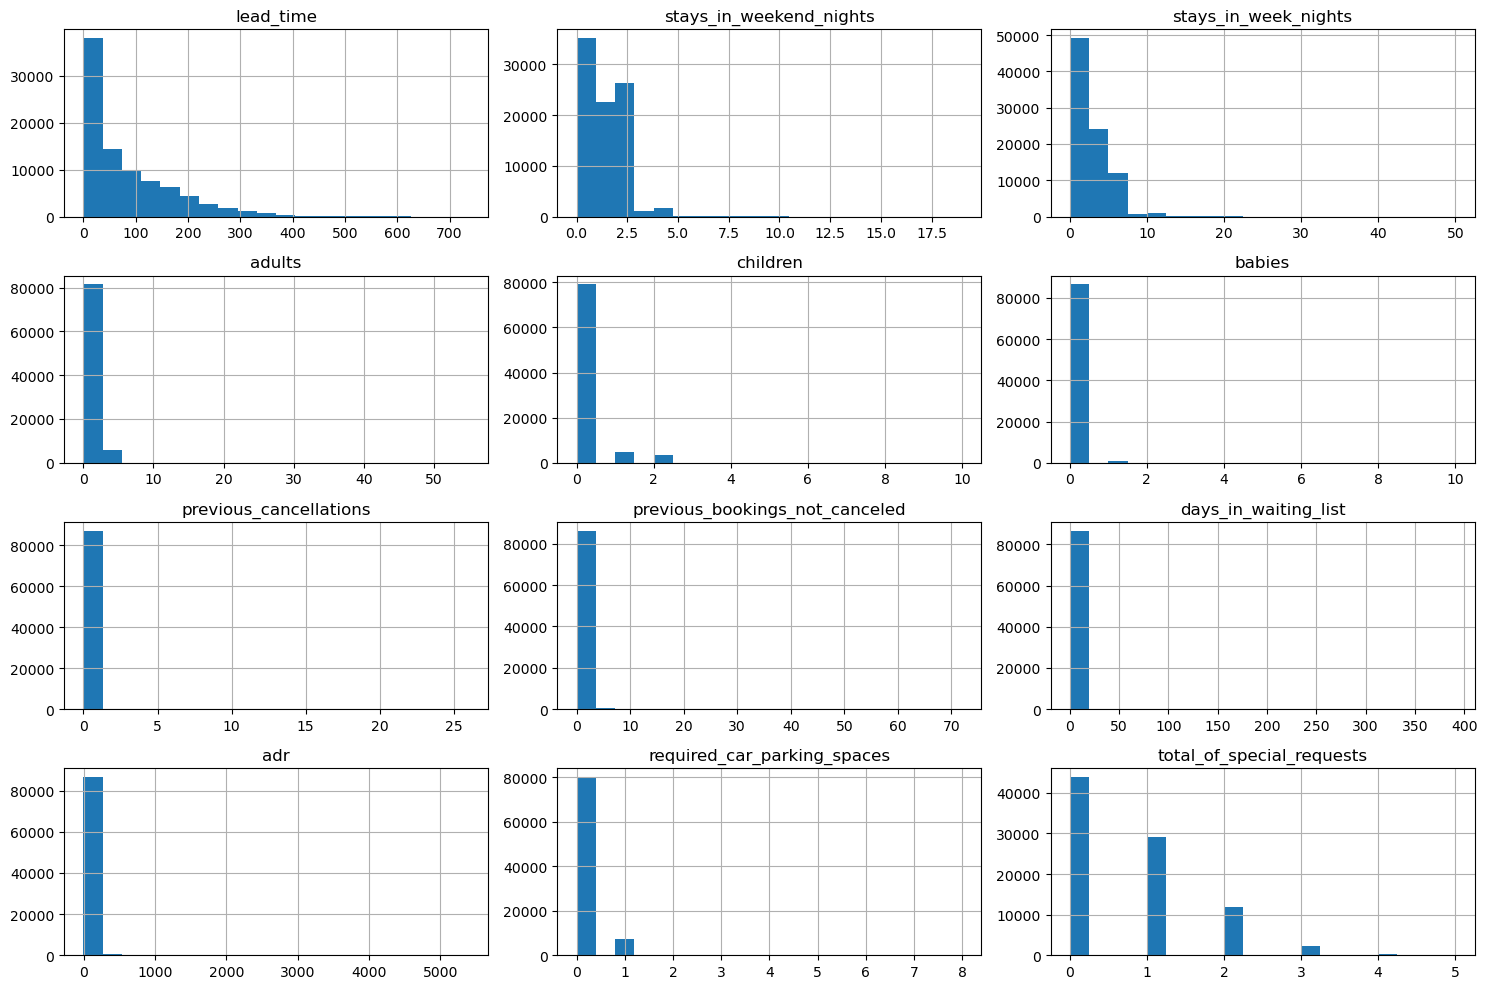

In [26]:
# Histograms for numerical columns
hotel_bookings[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()




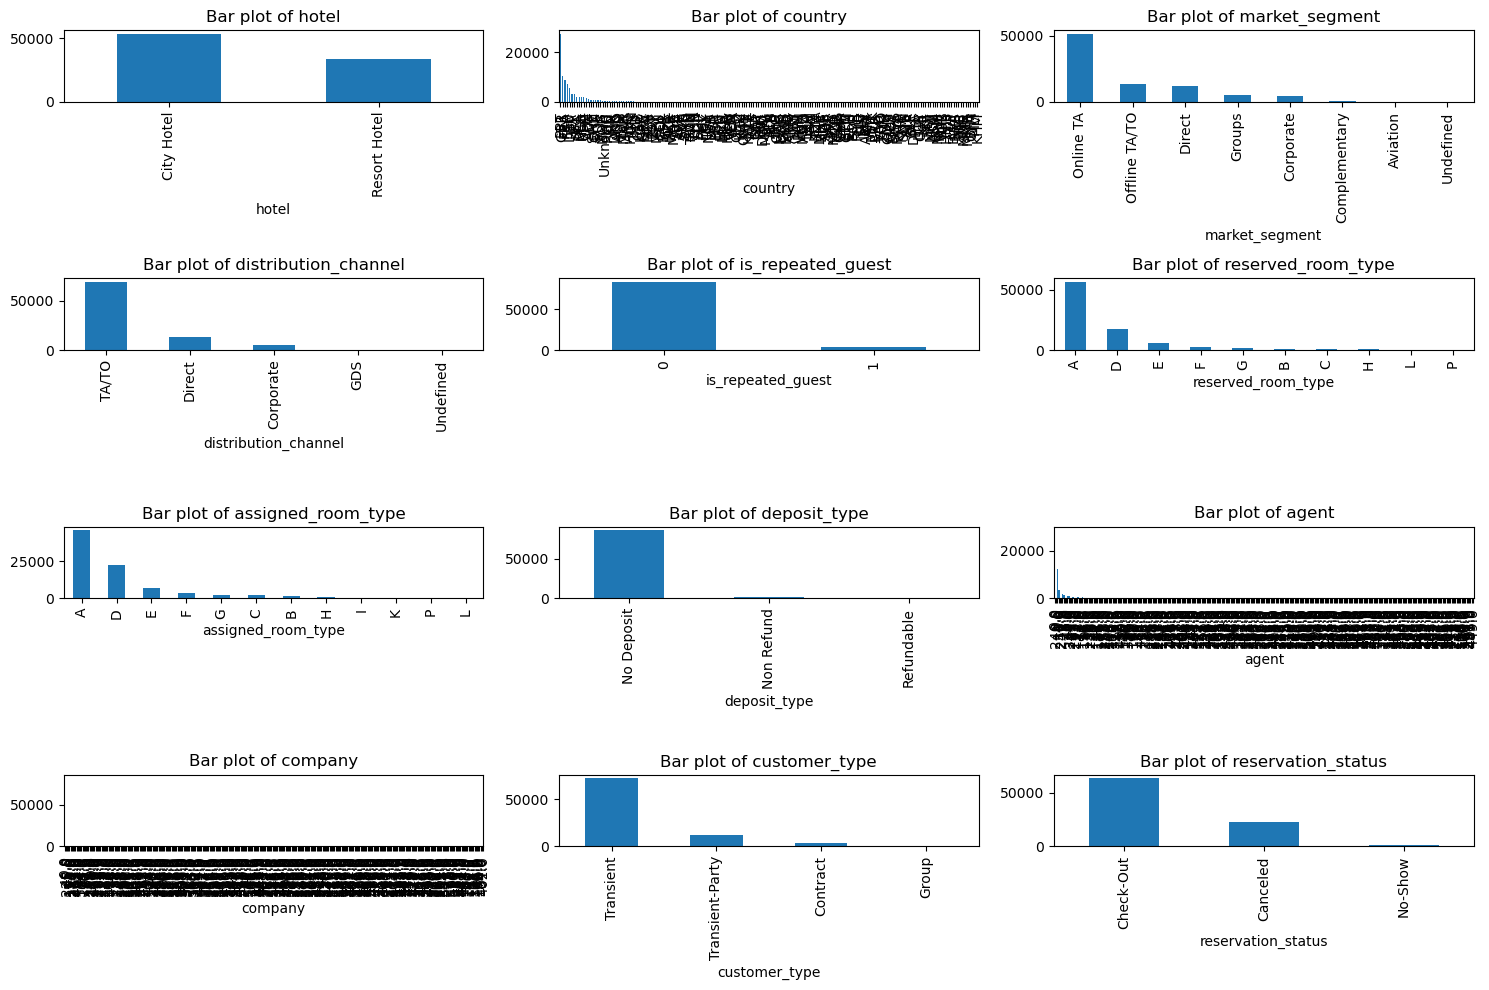

In [27]:
# Bar plots for categorical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    hotel_bookings[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

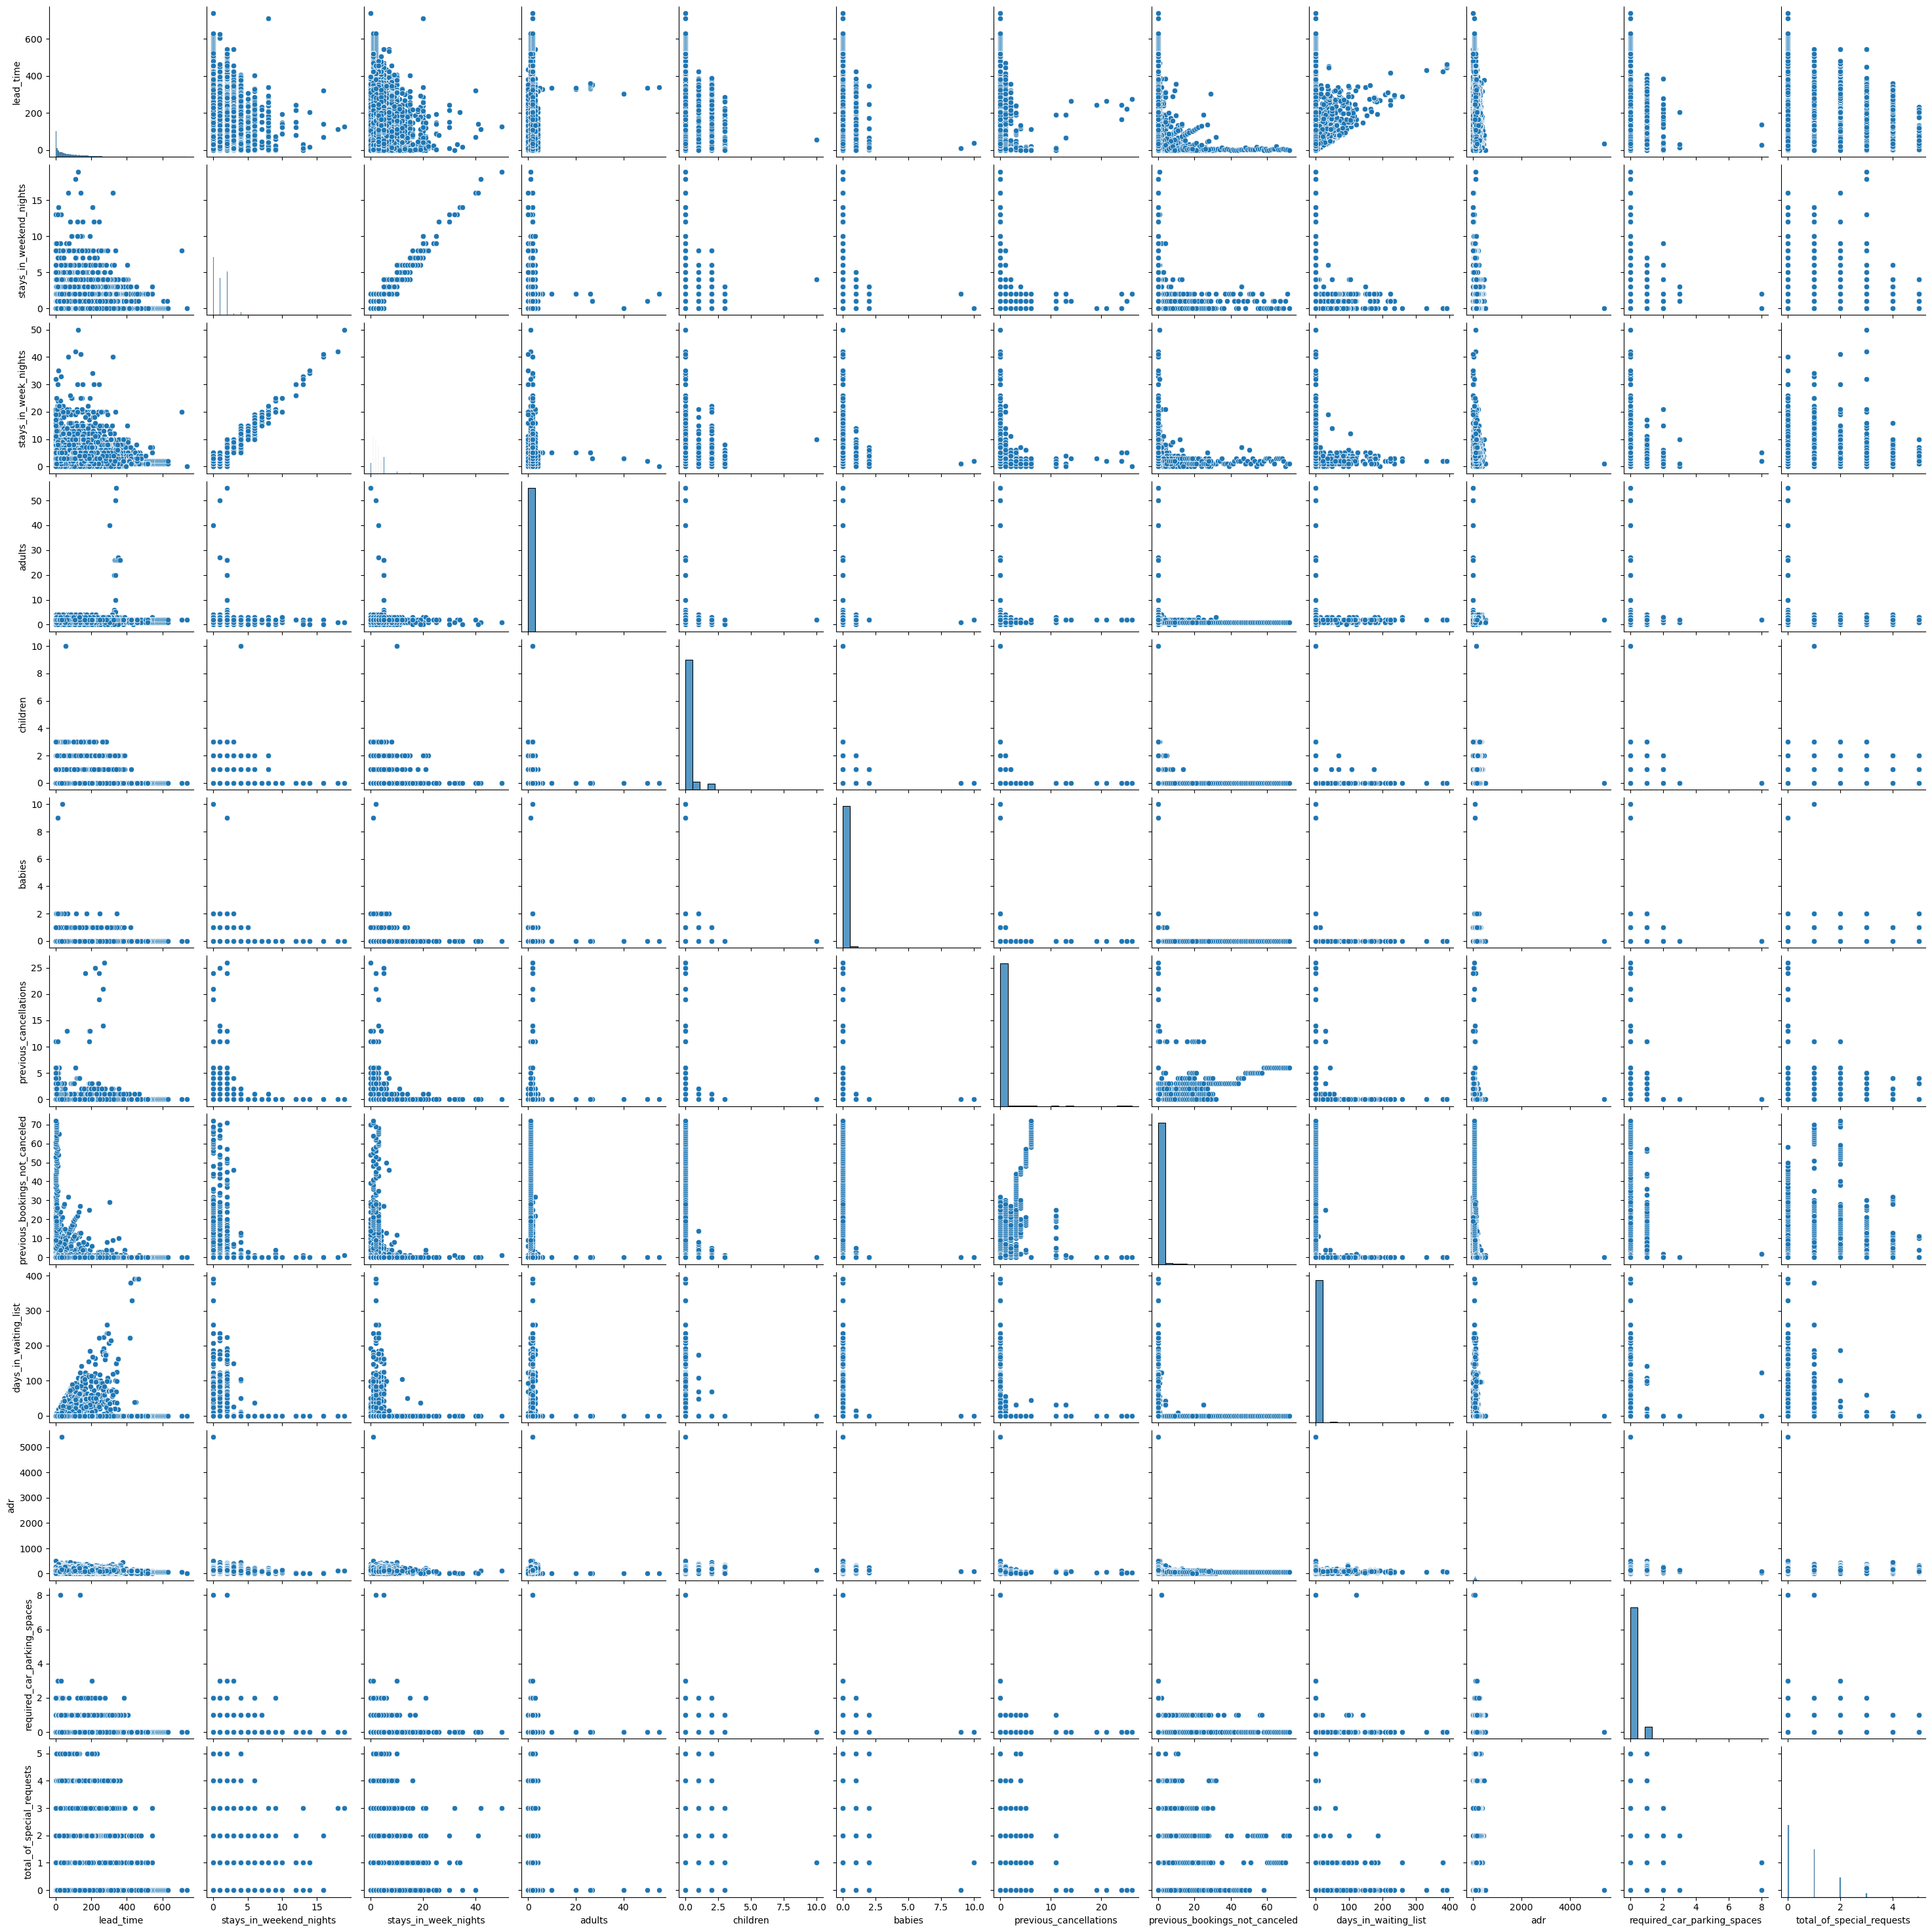

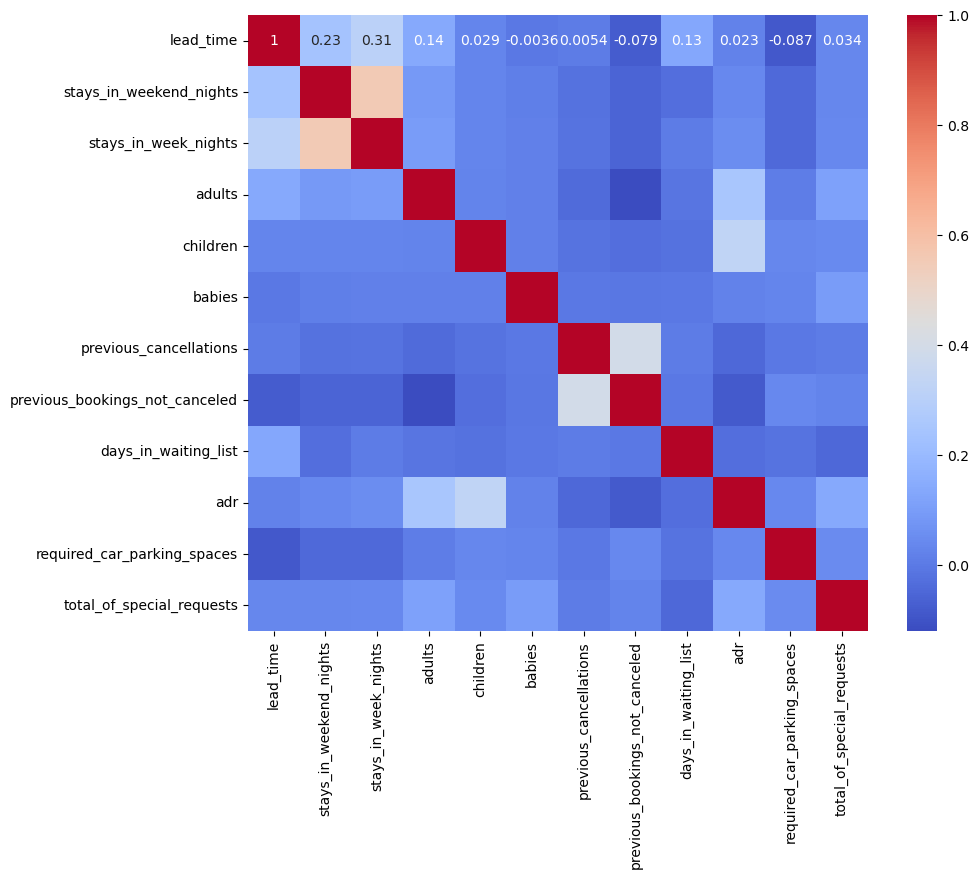

In [29]:
# Scatter plots for numerical columns
sns.pairplot(hotel_bookings[numerical_columns])
plt.show()

# Correlation heatmap
correlation_matrix = hotel_bookings[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Correlation Analysis

In [46]:
# Calculate the correlation matrix for numerical columns
correlation_matrix_cleaned = hotel_bookings_cleaned[numerical_columns].corr()

correlation_matrix_cleaned

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.254941,0.352733,NaN,NaN,NaN,NaN,NaN,NaN,0.038004,NaN,0.038199
stays_in_weekend_nights,0.254941,1.000000,0.489931,NaN,NaN,NaN,NaN,NaN,NaN,0.048563,NaN,0.032052
stays_in_week_nights,0.352733,0.489931,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.077788,NaN,0.043165
adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_cancellations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_bookings_not_canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_in_waiting_list,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adr,0.038004,0.048563,0.077788,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.151776


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


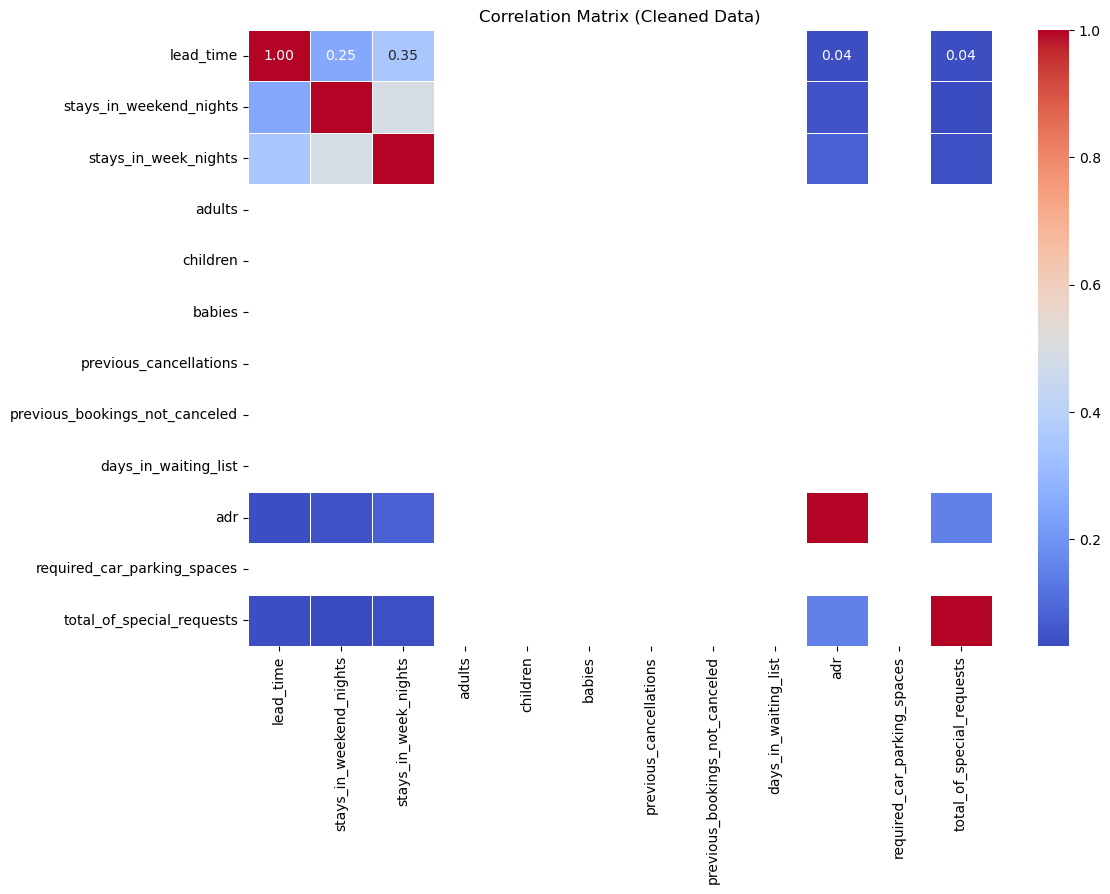

In [48]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()


# Categorical Data Analysis

In [49]:
# Perform one-hot encoding for categorical columns
hotel_bookings_encoded_cleaned = pd.get_dummies(hotel_bookings_cleaned, columns=categorical_columns, drop_first=True)
hotel_bookings_encoded_cleaned.head()



,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,296.0,2015,July,27,1,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
1,0,296.0,2015,July,27,1,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
2,0,7.0,2015,July,27,1,0.0,1.0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
3,0,13.0,2015,July,27,1,0.0,1.0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
4,0,14.0,2015,July,27,1,0.0,2.0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False


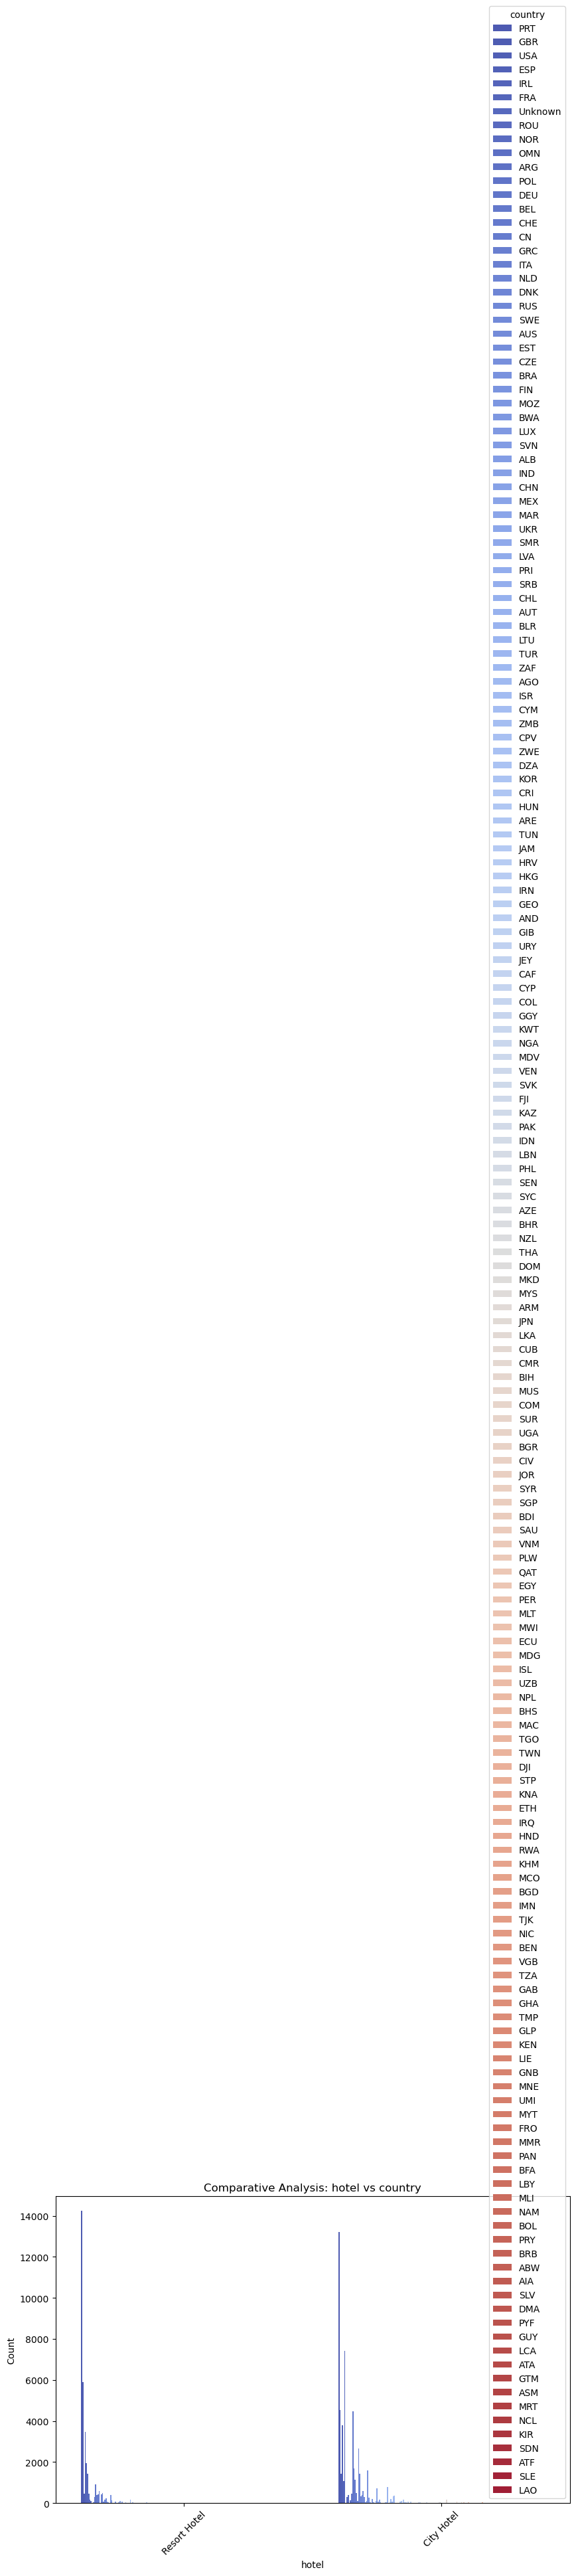

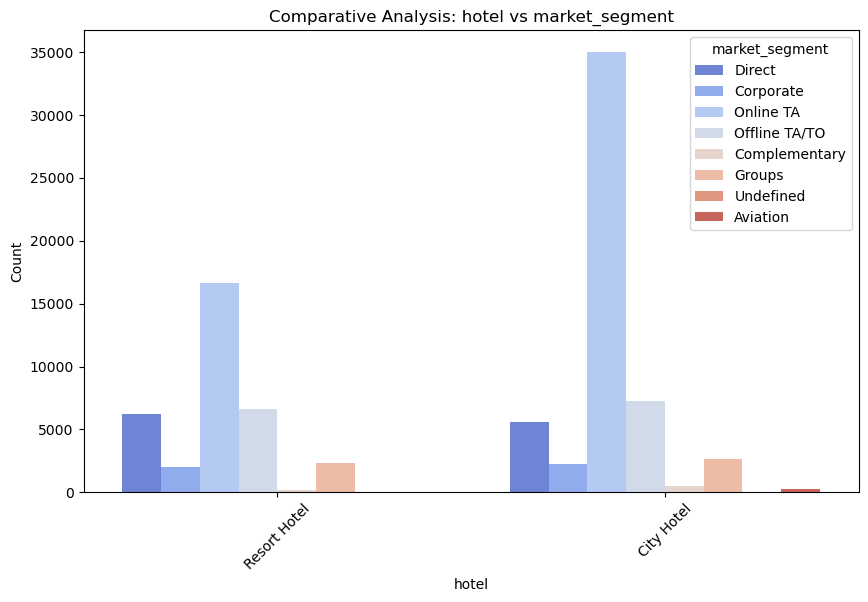

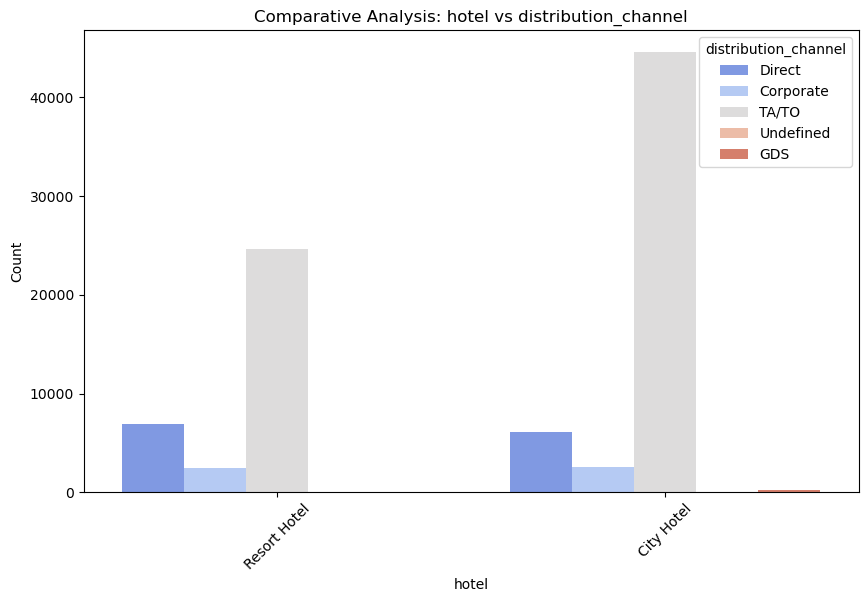

AttributeError: 'numpy.int64' object has no attribute 'startswith'

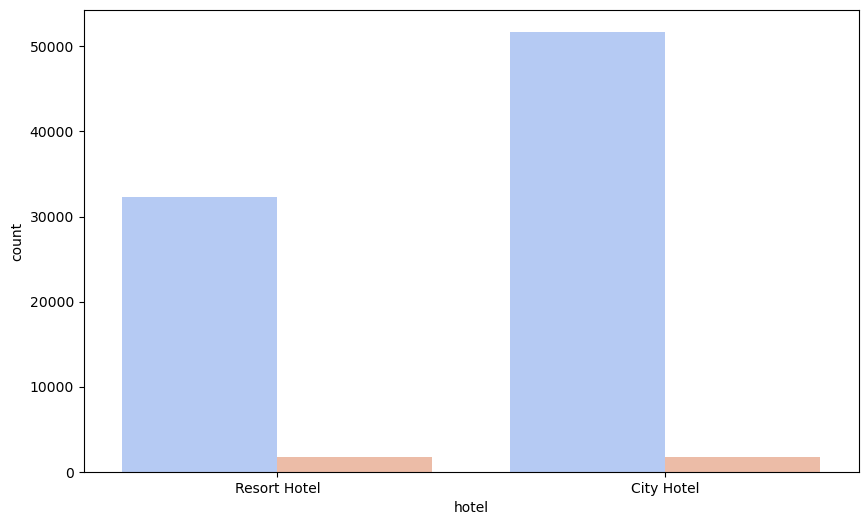

In [55]:
# Comparative Analysis of Pairs of Categorical Columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=hotel_bookings, x=col1, hue=col2, palette='coolwarm')
            plt.title(f'Comparative Analysis: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title=col2)
            plt.show()

# Cross-Tabulation Between Pairs of Categorical Columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cross_tab = pd.crosstab(hotel_bookings[col1], hotel_bookings[col2])
            print(f'Cross-tabulation between {col1} and {col2}:')
            print(cross_tab)
            print('\n')

<Figure size 1000x800 with 0 Axes>

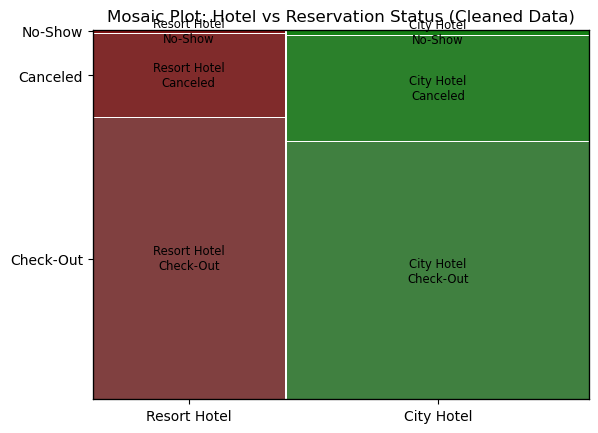

In [50]:
# Create contingency tables or mosaic plots to analyze the relationship between categorical columns
plt.figure(figsize=(10, 8))
mosaic(hotel_bookings_cleaned, ['hotel', 'reservation_status'])
plt.title('Mosaic Plot: Hotel vs Reservation Status (Cleaned Data)')
plt.show()


# Time Series Analysis

In [64]:
# Convert arrival date columns to a single datetime column
hotel_bookings_cleaned['arrival_date'] = pd.to_datetime(hotel_bookings_cleaned['arrival_date_year'].astype(str) + '-' +
                                                        hotel_bookings_cleaned['arrival_date_month'].astype(str) + '-01')
hotel_bookings_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,arrival_month,arrival_day,season
0,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,2.0,...,0.00,0.0,0.0,Check-Out,01/07/2015,2015-07-01,0.0,July,Wednesday,Summer
1,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,2.0,...,0.00,0.0,0.0,Check-Out,01/07/2015,2015-07-01,0.0,July,Wednesday,Summer
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,2.0,...,75.00,0.0,0.0,Check-Out,02/07/2015,2015-07-01,1.0,July,Wednesday,Summer
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,2.0,...,75.00,0.0,0.0,Check-Out,02/07/2015,2015-07-01,1.0,July,Wednesday,Summer
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2.0,...,98.00,0.0,1.0,Check-Out,03/07/2015,2015-07-01,2.0,July,Wednesday,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,August,35,30,2.0,5.0,2.0,...,96.14,0.0,0.0,Check-Out,06/09/2017,2017-08-01,7.0,August,Tuesday,Summer
119386,City Hotel,0,102.0,2017,August,35,31,2.0,5.0,2.0,...,225.43,0.0,2.0,Check-Out,07/09/2017,2017-08-01,7.0,August,Tuesday,Summer
119387,City Hotel,0,34.0,2017,August,35,31,2.0,5.0,2.0,...,157.71,0.0,2.5,Check-Out,07/09/2017,2017-08-01,7.0,August,Tuesday,Summer
119388,City Hotel,0,109.0,2017,August,35,31,2.0,5.0,2.0,...,104.40,0.0,0.0,Check-Out,07/09/2017,2017-08-01,7.0,August,Tuesday,Summer


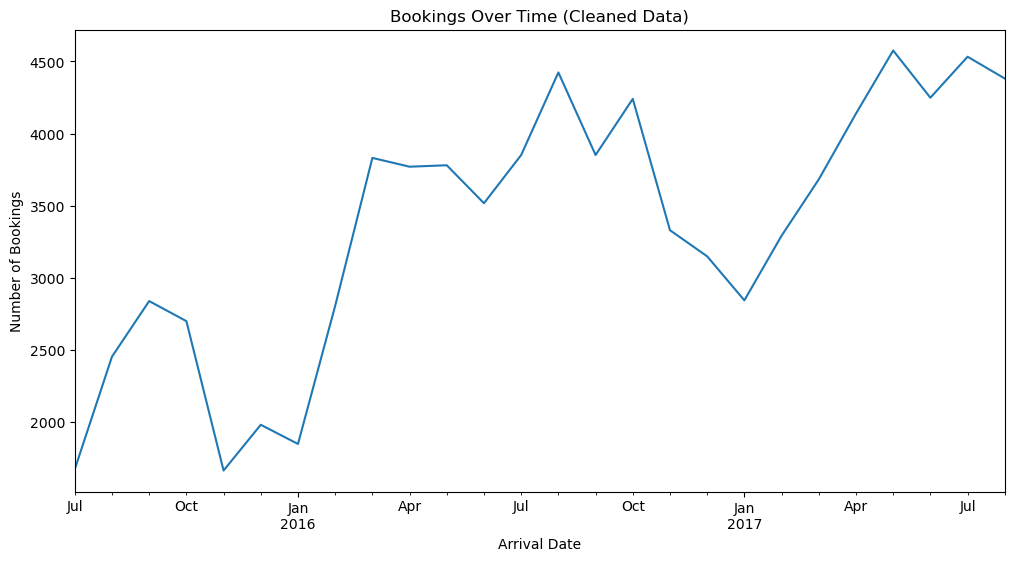

In [65]:
# Plot time series to identify trends and seasonality
plt.figure(figsize=(12, 6))
hotel_bookings_cleaned.groupby('arrival_date').size().plot(kind='line')
plt.title('Bookings Over Time (Cleaned Data)')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.show()


# Feature Engineering

In [66]:
# Calculate duration of stay
hotel_bookings_cleaned['total_stay'] = hotel_bookings_cleaned['stays_in_weekend_nights'] + hotel_bookings_cleaned['stays_in_week_nights']
hotel_bookings_cleaned['total_stay']

0         0.0
1         0.0
2         1.0
3         1.0
4         2.0
         ... 
119385    7.0
119386    7.0
119387    7.0
119388    7.0
119389    9.0
Name: total_stay, Length: 87403, dtype: float64

In [67]:
# Derive new features from date columns
hotel_bookings_cleaned['arrival_month'] = hotel_bookings_cleaned['arrival_date'].dt.month_name()
hotel_bookings_cleaned['arrival_day'] = hotel_bookings_cleaned['arrival_date'].dt.day_name()
hotel_bookings_cleaned['season'] = hotel_bookings_cleaned['arrival_date'].dt.month % 12 // 3 + 1
hotel_bookings_cleaned['season'] = hotel_bookings_cleaned['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

hotel_bookings_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,arrival_month,arrival_day,season
0,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,2.0,...,0.0,0.0,0.0,Check-Out,01/07/2015,2015-07-01,0.0,July,Wednesday,Summer
1,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,2.0,...,0.0,0.0,0.0,Check-Out,01/07/2015,2015-07-01,0.0,July,Wednesday,Summer
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,2.0,...,75.0,0.0,0.0,Check-Out,02/07/2015,2015-07-01,1.0,July,Wednesday,Summer
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,2.0,...,75.0,0.0,0.0,Check-Out,02/07/2015,2015-07-01,1.0,July,Wednesday,Summer
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2.0,...,98.0,0.0,1.0,Check-Out,03/07/2015,2015-07-01,2.0,July,Wednesday,Summer


# Handling Datetime Columns

In [68]:

# Convert reservation_status_date to datetime format with dayfirst=True
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date'], dayfirst=True)

# Extract additional features from the datetime column
hotel_bookings['reservation_status_day'] = hotel_bookings['reservation_status_date'].dt.day_name()
hotel_bookings['reservation_status_month'] = hotel_bookings['reservation_status_date'].dt.month_name()
hotel_bookings['reservation_status_hour'] = hotel_bookings['reservation_status_date'].dt.hour

# Display the first few rows to verify the changes
hotel_bookings[['reservation_status_date', 'reservation_status_day', 'reservation_status_month', 'reservation_status_hour']].head(10)


,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_hour
0,2015-07-01,Wednesday,July,0
1,2015-07-01,Wednesday,July,0
2,2015-07-02,Thursday,July,0
3,2015-07-02,Thursday,July,0
4,2015-07-03,Friday,July,0
6,2015-07-03,Friday,July,0
7,2015-07-03,Friday,July,0
8,2015-05-06,Wednesday,May,0
9,2015-04-22,Wednesday,April,0
10,2015-06-23,Tuesday,June,0
